1. 'instagram_태교여행.txt' 데이터를 읽어온 뒤, 숫자, 특수 문자 등을 제거하는 전처리 작업을 시행하시오.

In [ ]:
f = open(r'../data/instagram_태교여행.txt')
data = f.read()

In [ ]:
import re
text = re.sub('[^A-Za-z가-힣\\s]',' ',data)
text

2. 전처리된 데이터에서 '태교여행' 이란 단어를 사전에 추가하고 명사를 추출해 출현빈도 10위까지 막대그래프로 시각화하시오.

In [7]:
import pandas as pd
dict = pd.DataFrame(columns=['명사', '형태소'])
dict =dict.append({'명사' : '태교여행', '형태소':'NNP'},ignore_index=True)
dict

C:\Users\wagar\AppData\Local\Temp\ipykernel_11412\1683305222.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dict =dict.append({'명사' : '태교여행', '형태소':'NNP'},ignore_index=True)


,명사,형태소
0,태교여행,NNP


In [9]:
from collections import Counter
from konlpy.tag import *
okt = Okt()

nouns = okt.nouns(text)
count_dict = Counter(nouns)

top10 = pd.DataFrame({'terms':count_dict.keys(), 'freq':count_dict.values()}).sort_values(by='freq', ascending=False).iloc[:10,]
top10 = top10.set_index('terms').sort_values(by='freq', ascending=False)
top10

,freq
terms,
태교여행,216
여행,196
그램,129
스타,103
괌,95
임산부,64
주,50
맘,45
제주,37


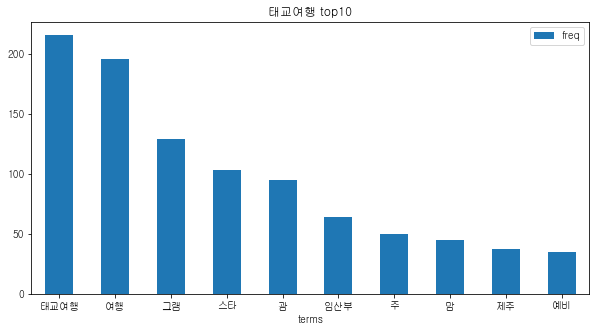

In [18]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

font_path = 'C:/Windows/Fonts/NGULIM.TTF'
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

fig, ax = plt.subplots(1,1)
plt.title('태교여행 top10')
top10.plot.bar(ax=ax, rot=0, figsize=(10,5))
plt.show()

3. 전처리된 데이터를 이용해 워드클라우드를 작성하고 인사이트를 추출하시오.

In [14]:
words = {}
for i in count_dict.most_common(20):
    words[i[0]] = i[1]

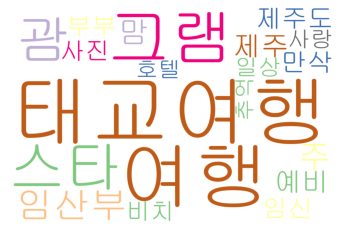

In [20]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

wordcloud = WordCloud(font_path=font_path, background_color='white', colormap='Accent_r',
                      width=1500, height=1000).generate_from_frequencies(words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()